### This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
mushrooms = pd.read_csv("mushrooms.csv")

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
from sklearn.preprocessing import LabelEncoder

mushrooms_num = mushrooms.copy()
for col in set(mushrooms_num.columns) - {'class'}:
    mushrooms_num[col] = LabelEncoder().fit_transform(mushrooms_num[col])

In [6]:
mushrooms_num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


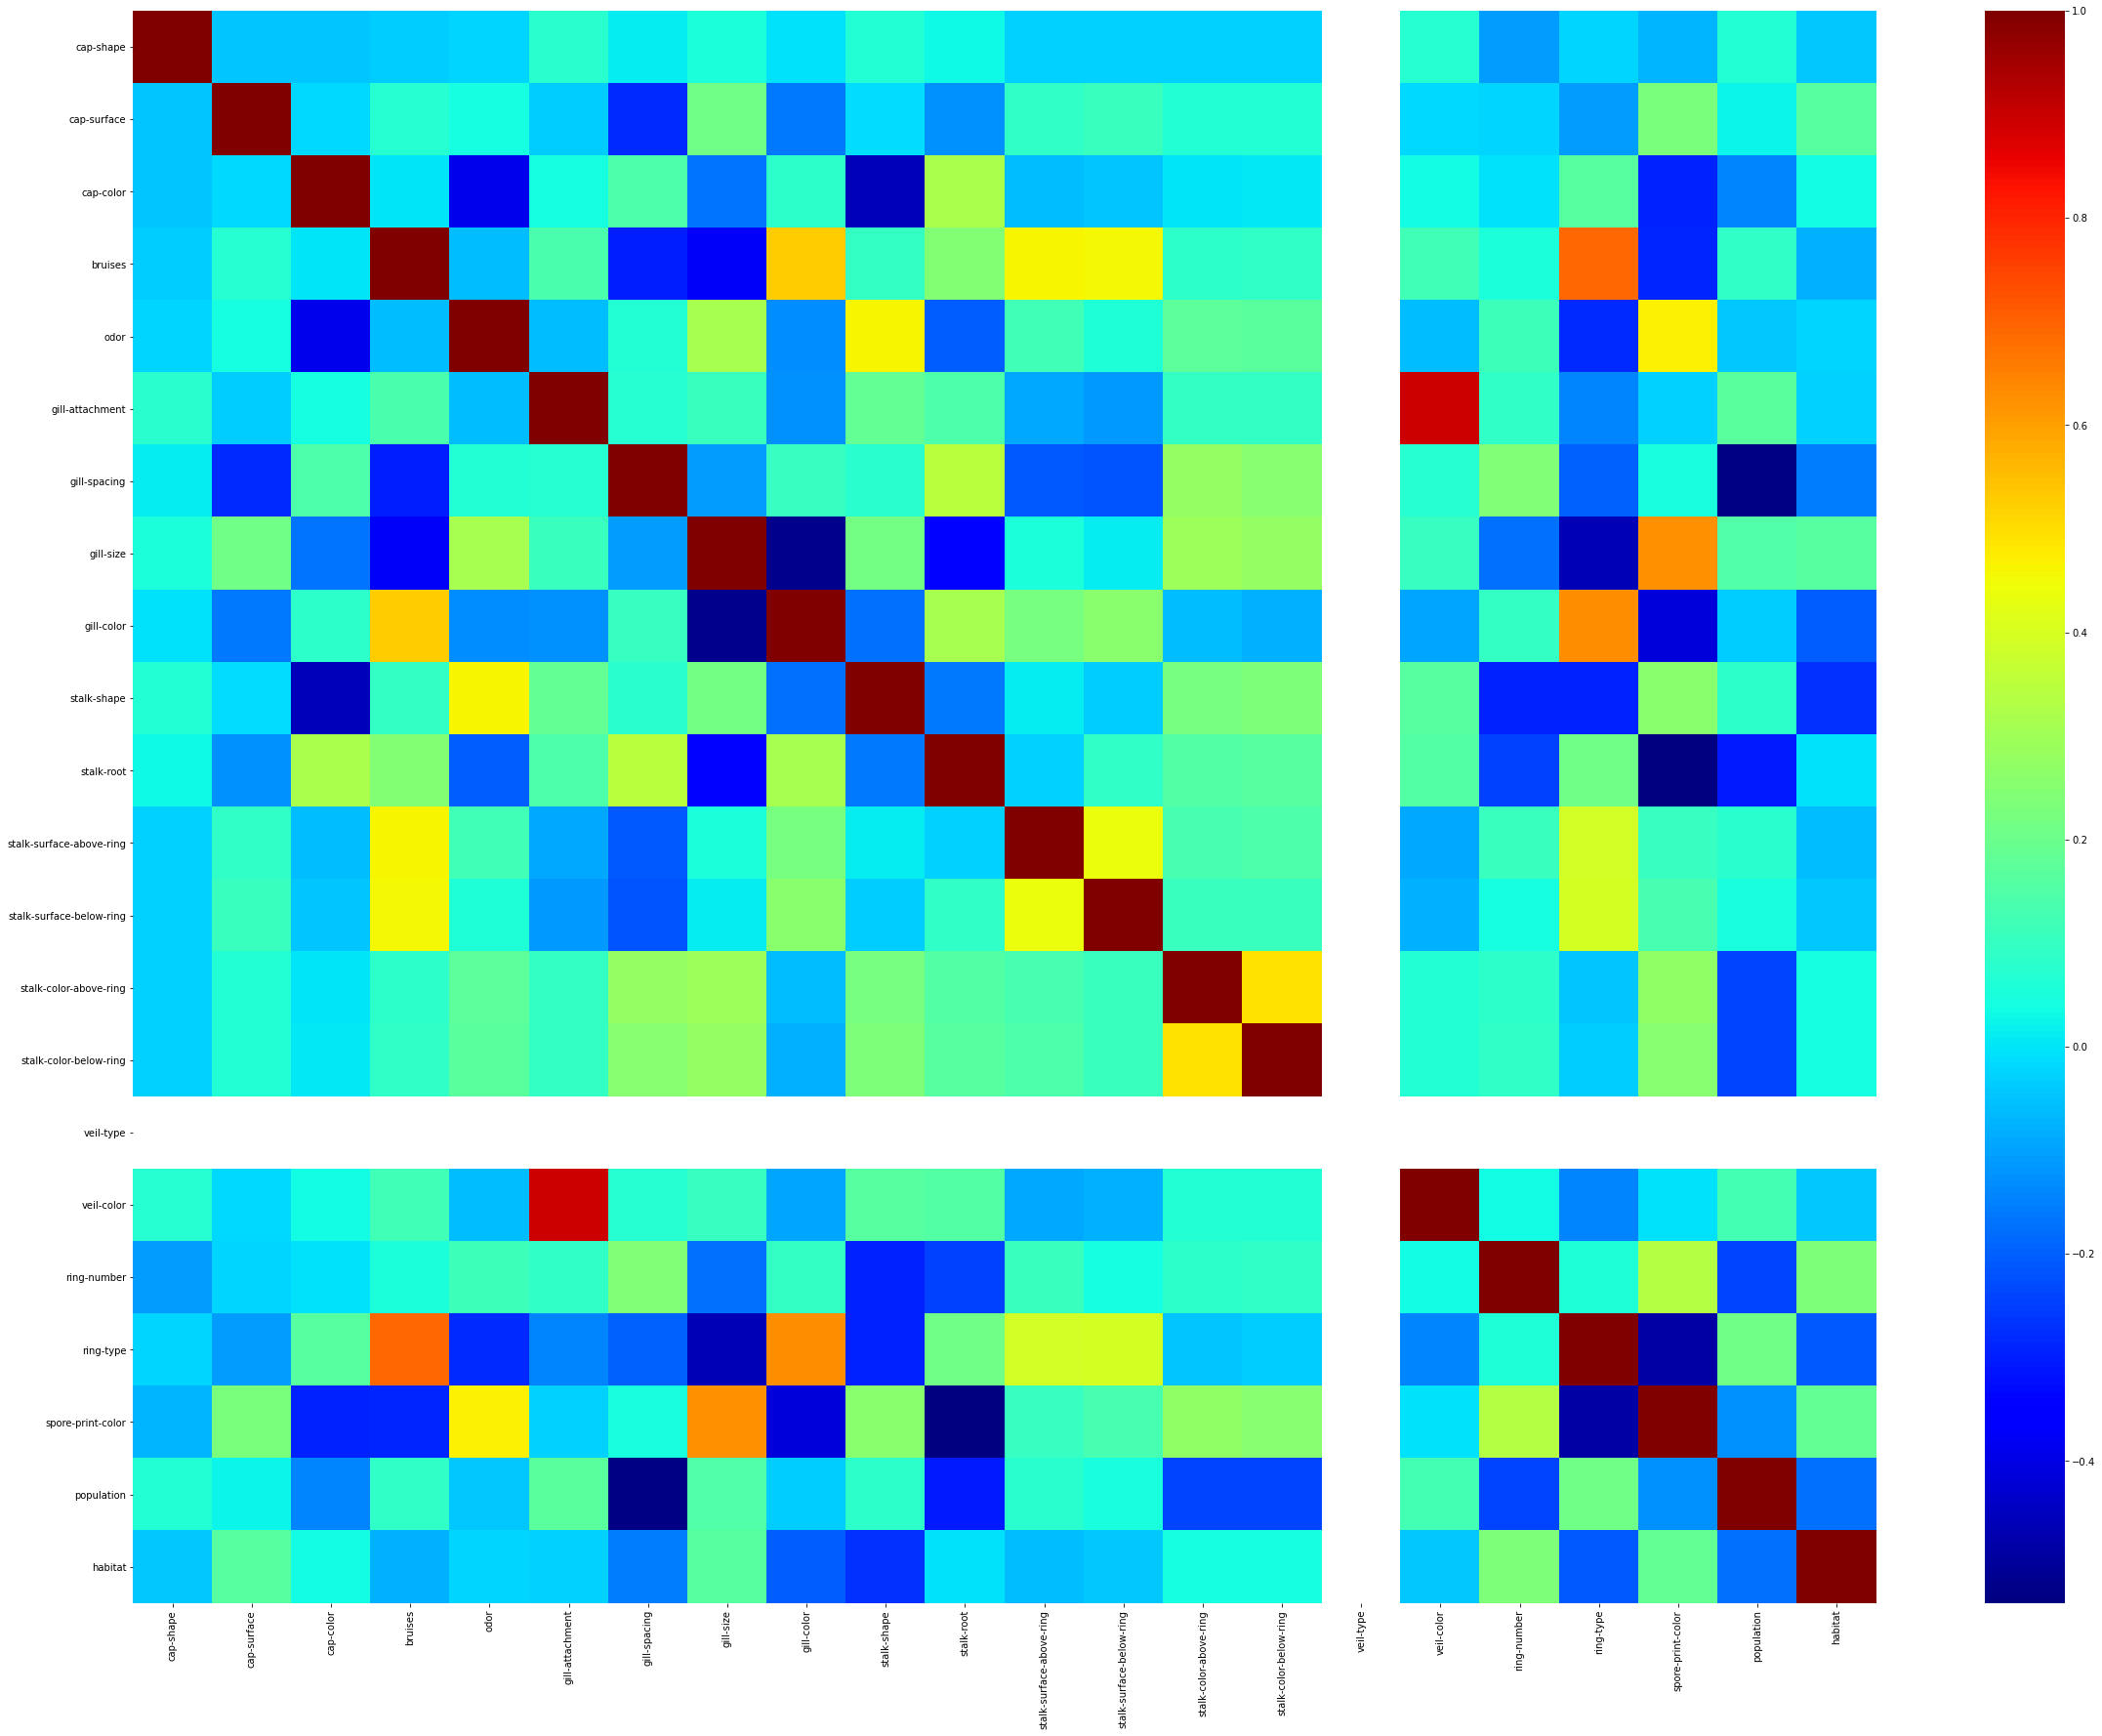

In [7]:
plt.figure(figsize=(40,30))
sns.heatmap(mushrooms_num.corr(), cmap=cm.jet)
plt.show()

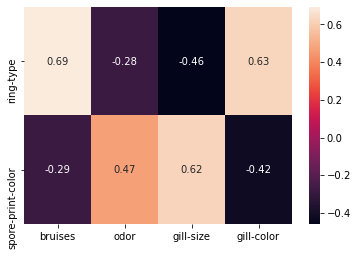

In [8]:
sns.heatmap(mushrooms_num.corr().loc[['ring-type', 'spore-print-color'],
                                 ['bruises', 'odor', 'gill-size', 'gill-color']],
           annot=True)
plt.show()

In [9]:
mushrooms_num.corr().loc['ring-type', 'bruises'], \
mushrooms_num.corr().loc['veil-color', 'gill-attachment']

(0.6929729184890898, 0.8975180742910238)

In [10]:
mushrooms_num['class'] = np.where(mushrooms_num['class']=='e', 1, 0)

In [11]:
mushrooms_num.corr()['class'].apply(abs).sort_values(ascending=False).iloc[1:]

gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
veil-type                        NaN
Name: class, dtype: float64

## Train and Test sets 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(mushrooms_num.drop('class', axis=1),
                                                     mushrooms_num['class'],
                                                     test_size=.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import SVC

log_reg = LogisticRegression(max_iter=500,
                             random_state=42) # raise iterations to help convergence
perceptron = SGDClassifier(max_iter=10, loss='perceptron', eta0=1, tol=None, penalty=None,
                       learning_rate='constant', random_state=42)
gnb = GaussianNB()
svc = SVC(C=.1, kernel='rbf', gamma='scale', random_state=42)
perceptron_rbf = SGDClassifier(max_iter=10, loss='perceptron', eta0=1, tol=None, penalty=None,
                       learning_rate='constant', random_state=42)

In [14]:
X_trainTr = RBFSampler(random_state=42).fit_transform(X_train)

In [15]:
models = [log_reg, perceptron, gnb, svm]
for model in models:
    model.fit(X_train, y_train)

perceptron_rbf.fit(X_trainTr, y_train)
    

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', max_iter=10,
              penalty=None, random_state=42, tol=None)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [27]:
models= [log_reg, perceptron, perceptron_rbf, gnb, svm]

def analyse_performance(model, output=False, features=X_train, labels=y_train):
    y_pred = cross_val_predict(model, features, labels,  n_jobs=-1, cv=10, method='predict')
    if not output:
        print(f'Accuracy: {accuracy_score(y_train, y_pred)}', end='\n')
        print(f'Precision: {precision_score(y_train, y_pred)}',end='\n' )
        print(f'Recall: {recall_score(y_train, y_pred)}', end='\n')
        print(f'f1 score: {f1_score(y_train, y_pred)}')
    else:
        return {'Accuracy': accuracy_score(y_train, y_pred), 'precision': precision_score(y_train, y_pred),
                'recall': recall_score(y_train, y_pred), 'F1': f1_score(y_train, y_pred)}

In [20]:
analyse_performance(log_reg, False, X_train, y_train )

Accuracy: 0.9499923065086936
Precision: 0.9436660828955049
Recall: 0.9607726597325409
f1 score: 0.9521425415991753


In [21]:
analyse_performance(perceptron, False, X_train, y_train)

Accuracy: 0.9204492998922911
Precision: 0.928141912206855
Recall: 0.9173848439821694
f1 score: 0.9227320280974444


In [22]:
analyse_performance(perceptron_rbf, False, X_trainTr, y_train)

Accuracy: 0.5330050777042622
Precision: 0.5489033787788975
Recall: 0.5503714710252601
f1 score: 0.5496364445763466


Bad performance of `perceptron_rbf` probably due to overfitting the data,

In [23]:
analyse_performance(gnb, False, X_train, y_train)

Accuracy: 0.9239883058932143
Precision: 0.9245785270629991
Recall: 0.9289747399702823
f1 score: 0.9267714201008005


In [26]:
analyse_performance(svm, False, X_train, y_train)

Accuracy: 0.944145253115864
Precision: 0.9081022294725394
Recall: 0.9925705794947994
f1 score: 0.9484594632968905


In [28]:
validation_performance =\
pd.DataFrame(data=[analyse_performance(model, True, X_train, y_train) for model in [log_reg, perceptron, gnb, svc]],
            index=['log_reg', 'perceptron', 'gnb', 'svc'])

In [29]:
validation_performance

,Accuracy,precision,recall,F1
log_reg,0.949992,0.943666,0.960773,0.952143
perceptron,0.920449,0.928142,0.917385,0.922732
gnb,0.923988,0.924579,0.928975,0.926771
svc,0.944145,0.908102,0.992571,0.948459


In [30]:
validation_performance.precision.rank(ascending=False, method='first')

log_reg       1.0
perceptron    2.0
gnb           3.0
svc           4.0
Name: precision, dtype: float64

In [33]:
validation_performance.recall.rank(ascending=False, method='first').sort_values()

svc           1.0
log_reg       2.0
gnb           3.0
perceptron    4.0
Name: recall, dtype: float64

In [37]:
validation_performance.F1.rank(ascending=False, method='first').sort_values()

log_reg       1.0
svc           2.0
gnb           3.0
perceptron    4.0
Name: F1, dtype: float64

The best performance seems to be attributed to logistic regression. Let's do some further performance analysis. <br>
In this case we are more interested in precision than recall, since the task at hand is that of identyfing potential health hazards from poisonous mushrooms. <br>
Let's then compare confusion matrices for `log_reg` and `svc`.

In [38]:
from sklearn.metrics import confusion_matrix

### Logistic  Regression

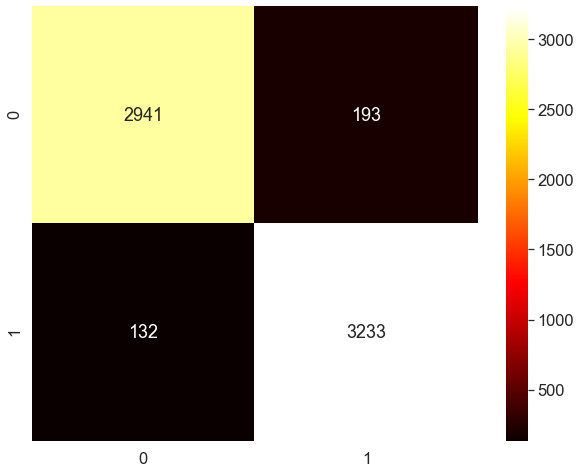

In [43]:
y_pred = cross_val_predict(log_reg, X_train, y_train, cv=10, n_jobs=-1)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(conf_mat, cmap=cm.hot, annot=True, fmt='d')
plt.show()

### SVC

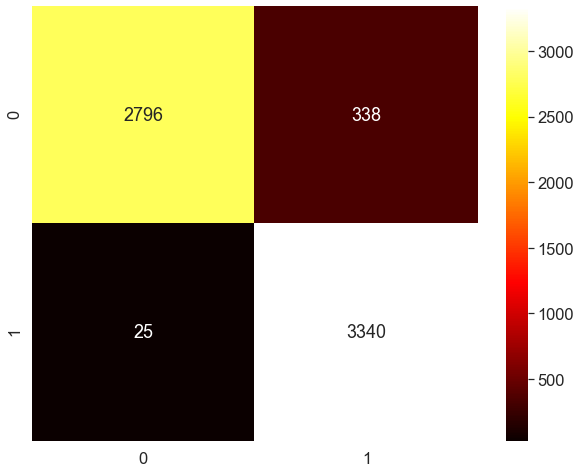

In [44]:
y_pred = cross_val_predict(svc, X_train, y_train, cv=10, n_jobs=-1)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(conf_mat, cmap=cm.hot, annot=True, fmt='d')
plt.show()

As expected logistic regression being more precise misclassifies more non poisonous mushrooms as poisonous, being more conservative in its predictions.

We now do some further visualisation and analysis related to the performance of our best model.

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [75]:
y_scores = cross_val_predict(log_reg, X_train, y_train, n_jobs=-1, method='decision_function', cv=10)

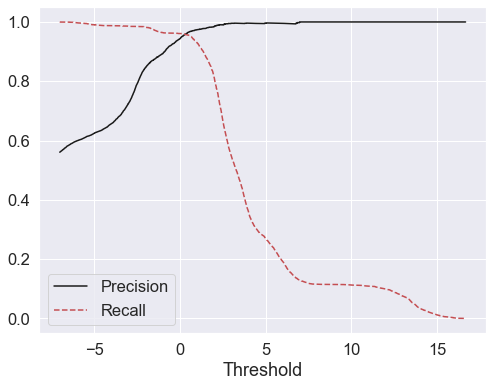

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "k", label="Precision")
plt.plot(thresholds, recalls[:-1], "r--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([-0.05, 1.05])

plt.show()

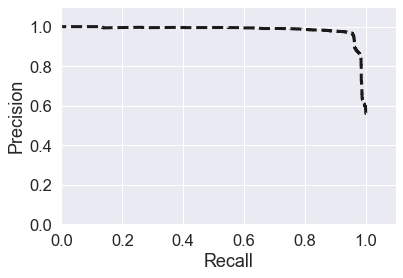

In [56]:
plt.plot(recalls, precisions, "k--", linewidth=3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.1, 0, 1.1])
plt.show()

**Outstanding Performance!**

We now plot a ROC curve, i.e. true positive rate, or recall, against false positive rate (the complementary of specificity).

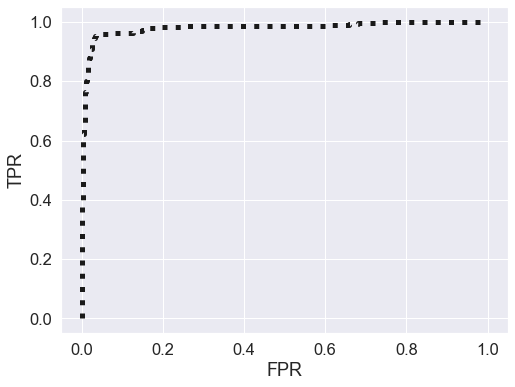

In [61]:
fpr, tpr, thresh = roc_curve(y_train, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'k:', linewidth=5)
plt.xlabel('FPR') # False positive rate
plt.ylabel('TPR') # True positive rate
plt.show()

The roc auc score measures how hight the positive rate can while maintaining a low false positive rate by calculating the area under the above curve. A random identifier has .5 roc score, while a pefect identifier has 1.

In [62]:
roc_auc_score(y_train, y_scores)

0.9809809679771588

as expected from the curve above the clasifier has a very high performance with respect to this metric as well.

# Testing

In [68]:
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}', end="\n")
print(f'Precision: {precision_score(y_test, y_pred_test)}', end="\n")
print(f'Recall: {recall_score(y_test, y_pred_test)}', end="\n")
print(f'F1: {f1_score(y_test, y_pred_test)}')

Accuracy: 0.9476923076923077
Precision: 0.9511904761904761
Recall: 0.9478054567022538
F1: 0.9494949494949495


In [80]:
y_scores_test = log_reg.predict_proba(X_test)[:, 1]

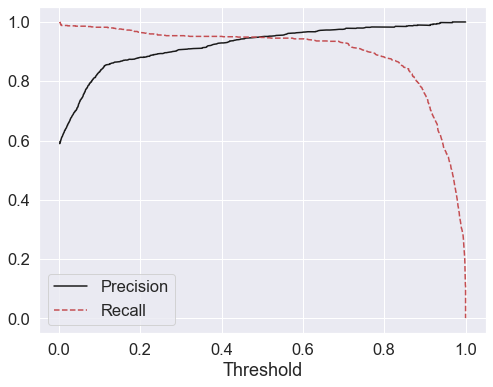

In [83]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_test)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "k", label="Precision")
plt.plot(thresholds, recalls[:-1], "r--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([-0.05, 1.05])

plt.show()

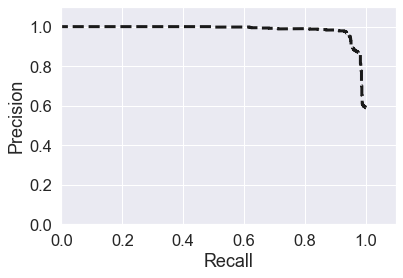

In [84]:
plt.plot(recalls, precisions, "k--", linewidth=3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.1, 0, 1.1])
plt.show()

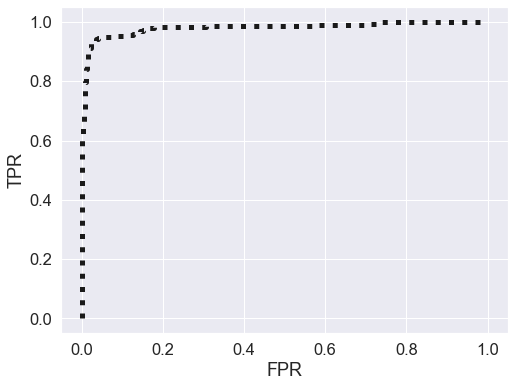

In [85]:
fpr, tpr, thresh = roc_curve(y_test, y_scores_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'k:', linewidth=5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Ensemble Learning 1

## Bagging

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
plt.rcParams['axes.labelsize'] = 16
plt.style.use('seaborn')

In [3]:
mushrooms = pd.read_csv("mushrooms.csv")

In [4]:
mushrooms_num = mushrooms.copy()

In [5]:
mushrooms_num['class'] = np.where(mushrooms_num['class']=='e', 1, 0)

In [6]:
from sklearn.preprocessing import LabelEncoder

for col in set(mushrooms_num.columns) - {'class'}:
    mushrooms_num[col] = LabelEncoder().fit_transform(mushrooms_num[col])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(mushrooms_num.drop('class', axis=1),
                                                     mushrooms_num['class'],
                                                     test_size=.2, random_state=42)

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_predict

In [9]:
def report_performance(model, features, labels, *, plots=False):
    y_pred = model.predict(features)
    print(f'Accuracy: {accuracy_score(labels, y_pred)}', end='\n')
    print(f'Precision: {precision_score(labels, y_pred)}',end='\n' )
    print(f'Recall: {recall_score(labels, y_pred)}', end='\n')
    print(f'f1 score: {f1_score(labels, y_pred)}')

    if plots:
        print()
        plt.figure(figsize=(16, 8))
        plt.subplot(121)
        y_scores = model.predict_proba(features)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(labels, y_scores)

        plt.plot(thresholds, precisions[:-1], "k", label="Precision", linewidth=3)
        plt.plot(thresholds, recalls[:-1], "r--", label="Recall", linewidth=3)
        plt.xlabel("Threshold")
        plt.legend(loc="best")
        plt.ylim([-0.05, 1.05])
        
        plt.subplot(122)
        fpr, tpr, thresh = roc_curve(labels, y_scores)

        plt.plot(fpr, tpr, 'k:', linewidth=5)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        

        plt.show()
        
        print(f'ROC score: {roc_auc_score(labels, y_pred)}')


In [10]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',
                                                                       splitter='best',
                                                                       random_state=42), n_estimators=400,
                                 max_samples=170, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)

bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=170, n_estimators=400, n_jobs=-1, oob_score=True,
                  random_state=42)

Accuracy: 0.9946145560855516
Precision: 0.9923122412773506
Recall: 0.9973254086181278
f1 score: 0.9948125092633763



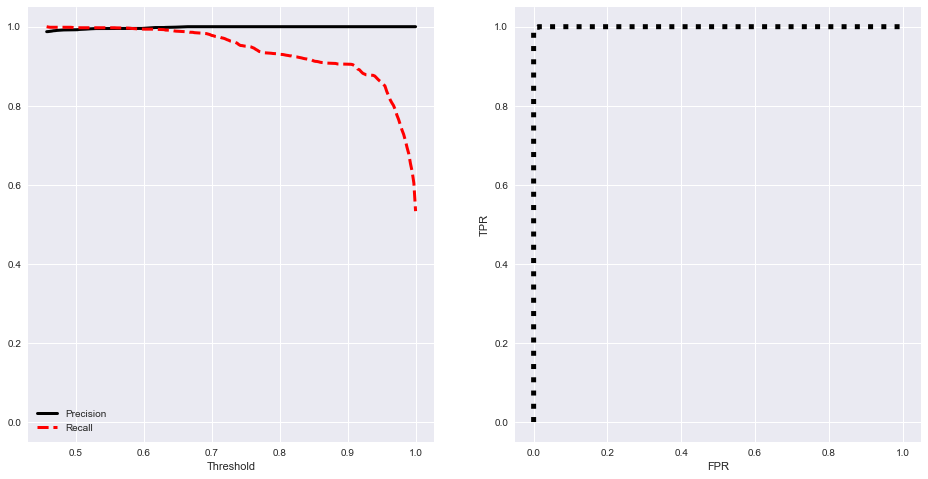

ROC score: 0.9945146507034481


In [11]:
report_performance(bagging_clf, X_train, y_train, plots=True)

## Testing

Accuracy: 0.9950769230769231
Precision: 0.9940828402366864
Recall: 0.99644128113879
f1 score: 0.995260663507109



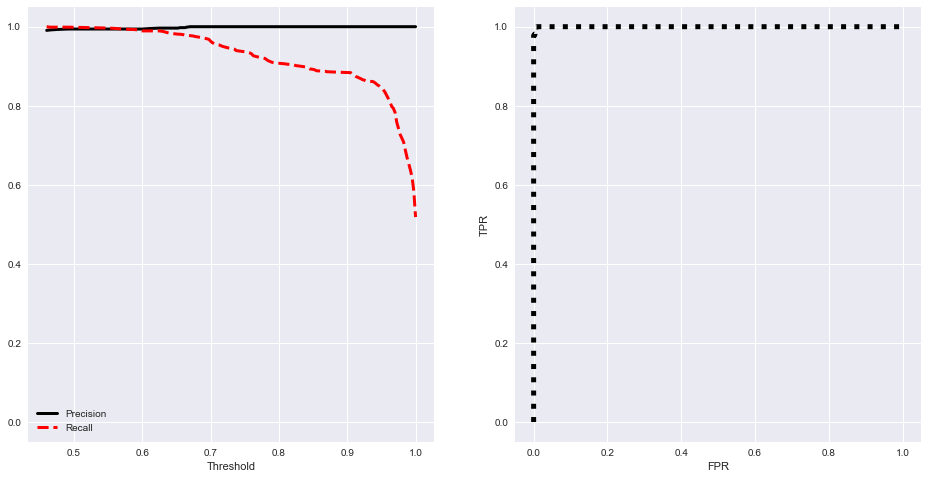

ROC score: 0.9950237096231034


In [12]:
report_performance(bagging_clf, X_test, y_test, plots=True)

**Amazing Performance!**

## Boosting

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',
                                                                  splitter='random',
                                                                   max_depth=10,
                                                                  random_state=42),
                            n_estimators=400,
                            learning_rate=.1,
                            algorithm='SAMME.R',
                            random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=42,
                                                         splitter='random'),
                   learning_rate=0.1, n_estimators=400, random_state=42)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0



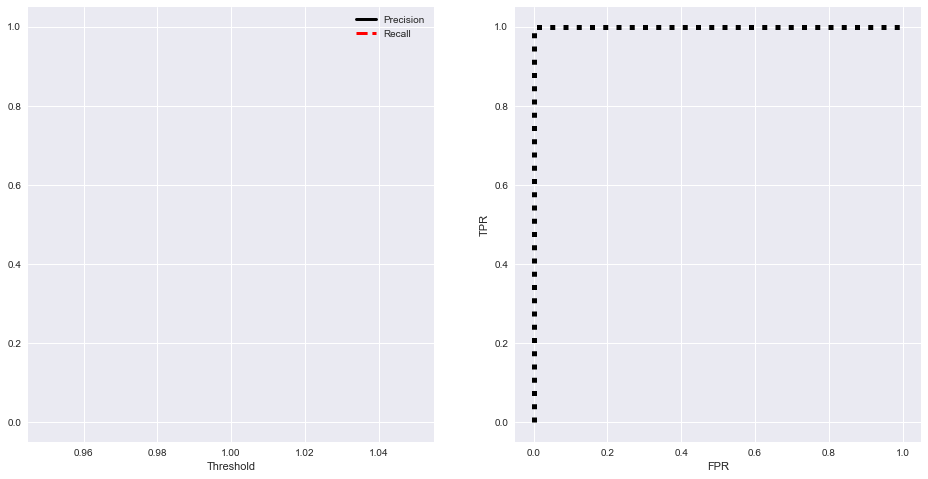

ROC score: 1.0


In [43]:
report_performance(ada_clf, X_train, y_train, plots=True)

## Testing

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0



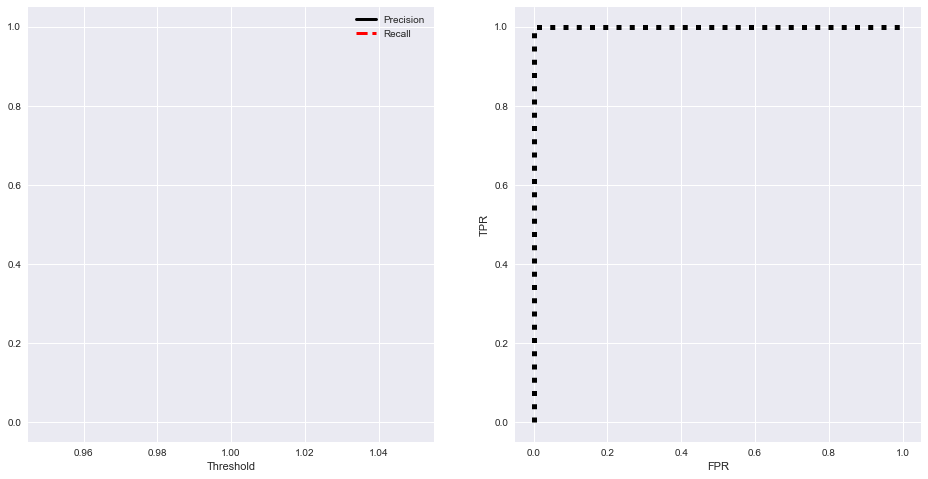

ROC score: 1.0


In [44]:
report_performance(ada_clf, X_test, y_test, plots=True)

In [60]:
for i in range(543, 564):
    xval = X_test.iloc[i]
    yval = y_test.iloc[i]
    print(f'trueVal: {yval}, pred: {ada_clf.predict([xval.values])}', end='\n')

trueVal: 0, pred: [0]
trueVal: 1, pred: [1]
trueVal: 1, pred: [1]
trueVal: 1, pred: [1]
trueVal: 1, pred: [1]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 1, pred: [1]
trueVal: 0, pred: [0]
trueVal: 1, pred: [1]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]
trueVal: 1, pred: [1]
trueVal: 1, pred: [1]
trueVal: 1, pred: [1]
trueVal: 0, pred: [0]
trueVal: 0, pred: [0]


**Boosting gives perfect performance!**